<a href="https://www.kaggle.com/code/sutariyasmit01/creditrisk-random-forest?scriptVersionId=244656811" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv


In [2]:
Df=pd.read_csv("/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv")

In [3]:
Df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
Df.shape

(32581, 12)

In [5]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
Df.isnull().sum()[Df.isnull().sum()>0]

person_emp_length     895
loan_int_rate        3116
dtype: int64

**now we must use heatmap for imputation but lets first convert object columns to numeric.**

In [7]:
from sklearn.preprocessing  import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
Df[Df.select_dtypes(include=["object"]).columns]=Df[Df.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [10]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int64  
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  int64  
 5   loan_grade                  32581 non-null  int64  
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int64  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.0 MB


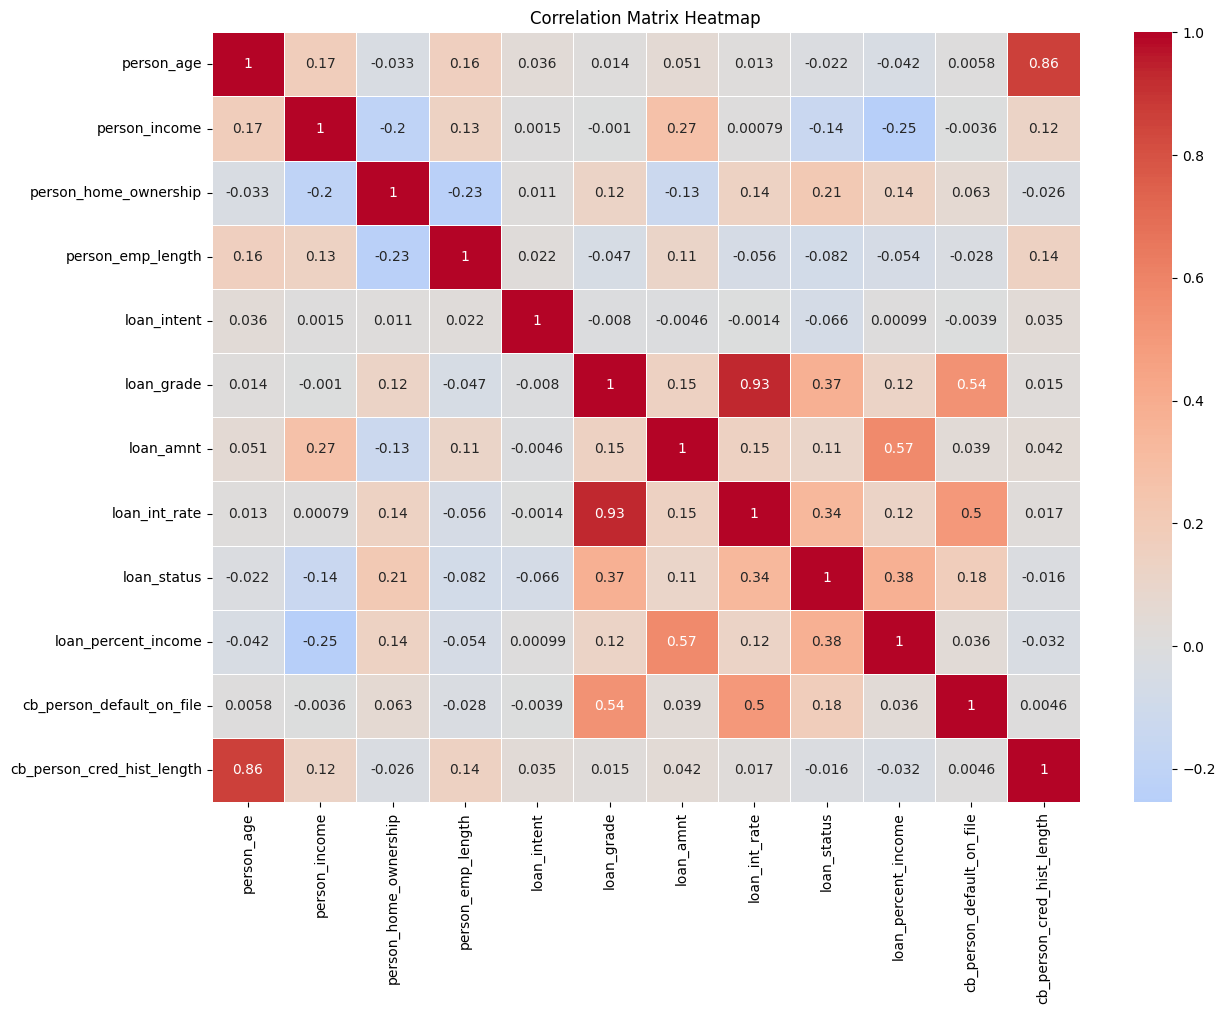

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = Df.corr()

# Set the figure size
plt.figure(figsize=(14, 10))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


In [12]:
#loan_int_rate and loan_grade very corelated so we will use it to impute loan_int_rate
train_data = Df[Df['loan_int_rate'].notna()].copy()
test_data = Df[Df['loan_int_rate'].isna()].copy()


In [13]:
X_train = train_data[['loan_grade']] # Predictor
y_train = train_data['loan_int_rate']  # Target


In [14]:
X_train.shape

(29465, 1)

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [16]:
model.fit(X_train, y_train)


LinearRegression()

In [17]:
X_test = test_data[['loan_grade']]


In [18]:
test_data['loan_int_rate'] = model.predict(X_test)


In [19]:
Df.loc[Df['loan_int_rate'].isna(), 'loan_int_rate'] = test_data['loan_int_rate']


In [20]:
Df.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             895
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [21]:
Df.person_emp_length=Df.person_emp_length.fillna(Df.person_emp_length.mean())

In [22]:
Df.person_emp_length.value_counts()

person_emp_length
0.000000      4105
2.000000      3849
3.000000      3456
5.000000      2946
1.000000      2915
4.000000      2874
6.000000      2666
7.000000      2196
8.000000      1687
9.000000      1367
4.789686       895
11.000000      740
10.000000      696
12.000000      575
13.000000      426
14.000000      335
15.000000      238
16.000000      165
17.000000      129
18.000000      104
19.000000       64
20.000000       42
21.000000       38
22.000000       19
24.000000       10
23.000000       10
25.000000        8
26.000000        6
27.000000        5
31.000000        4
28.000000        3
123.000000       2
30.000000        2
41.000000        1
34.000000        1
29.000000        1
38.000000        1
Name: count, dtype: int64

In [23]:
Df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
Df_train,Df_test=train_test_split(Df,test_size=0.2)

In [26]:
Df_train_x=Df_train.drop(columns=['loan_status'])
Df_test_x=Df_test.drop(columns=['loan_status'])
Df_train_y=Df_train['loan_status']
Df_test_y=Df_test['loan_status']



In [27]:
from sklearn.ensemble import RandomForestClassifier
CR_RF=RandomForestClassifier(criterion='entropy',max_depth=19,n_estimators=55,  min_samples_split=18)
CR_RF.fit(Df_train_x,Df_train_y)


RandomForestClassifier(criterion='entropy', max_depth=19, min_samples_split=18,
                       n_estimators=55)

In [28]:
pred_RF=CR_RF.predict(Df_test_x)

In [29]:
pred_RF

array([0, 1, 0, ..., 1, 0, 0])

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Df_test_y,pred_RF)

array([[5090,   22],
       [ 413,  992]])

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(Df_test_y,pred_RF)

0.9332514960871566

In [32]:
from sklearn.metrics import f1_score
f1_score(Df_test_y, pred_RF)

0.8201736254650682

**lets use GridSearch CV here to find best parameters** 


In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
search_dic = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3, 20, 2),               # 3, 5, 7, ..., 19
    'min_samples_split': range(10, 22, 2),      # 10, 12, ..., 20
    'n_estimators': range(20, 60, 5)            # 20, 25, ..., 55
}


In [35]:
grid=GridSearchCV(CR_RF,param_grid=search_dic, n_jobs=-1,cv=5,scoring = 'f1'
)

In [36]:
grid.fit(Df_train_x,Df_train_y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=19,
                                              min_samples_split=18,
                                              n_estimators=55),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 20, 2),
                         'min_samples_split': range(10, 22, 2),
                         'n_estimators': range(20, 60, 5)},
             scoring='f1')

In [37]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 19,
 'min_samples_split': 10,
 'n_estimators': 45}

In [40]:
CR_RF.feature_importances_

array([0.02878511, 0.15377051, 0.12593093, 0.05368214, 0.07656924,
       0.13912431, 0.06083872, 0.10127266, 0.23084978, 0.00765365,
       0.02152295])

In [41]:
Df_train_x.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [44]:
feature_imp = pd.DataFrame({
    'feature': Df_train_x.columns,
    'importance': CR_RF.feature_importances_
})
feature_imp

,feature,importance
0,person_age,0.028785
1,person_income,0.153771
2,person_home_ownership,0.125931
3,person_emp_length,0.053682
4,loan_intent,0.076569
5,loan_grade,0.139124
6,loan_amnt,0.060839
7,loan_int_rate,0.101273
8,loan_percent_income,0.230850
9,cb_person_default_on_file,0.007654


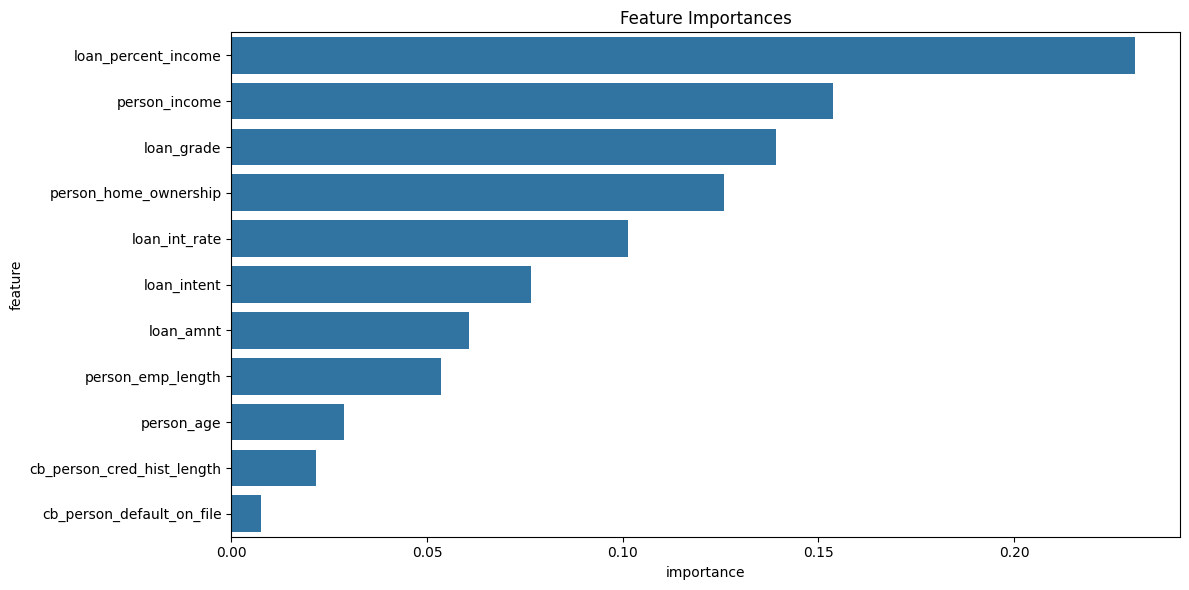

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort and plot
feature_imp = feature_imp.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_imp)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()
